# 🔧 ML Hyperparameter Tuning: Best method?
idea: re-experiment and to reproduce the visualization results inspired from *Timur Bikmukhametov, PhD*  [post](https://www.linkedin.com/posts/timurbikmukhametov_ml-hyperparameter-tuning-best-method-bayesian-activity-7317878891946147842-G6ov?utm_source=share&utm_medium=member_desktop&rcm=ACoAACQT1P8BKYUT_XqdrqWgMiSjxYsPWF1wj4c) in Linkedin (see his post for further details he sumrrized)


## Bayesian vs Random vs Grid Search

In this notebook, we compare three popular hyperparameter optimization techniques:

- **Grid Search**: Exhaustive and brute-force, tries all combinations in a fixed grid.
- **Random Search**: Samples randomly from the search space.
- **Bayesian Optimization** (via `Hyperopt`): Builds a probabilistic model to choose the next best point to evaluate based on past results.

---

## 🛠️ Implementation Highlights

✅ This visualization includes:

- **3-tier subplot layout**:
  - **Top row**: Objective function values over iterations.
  - **Middle row**: Cumulative objective function scores (lower is better).
  - **Bottom row**: 2D contour plots showing the search trajectories of each method.

- **Contour background** visualizes the optimization surface for a toy function with known global minimum.

- **Main title updates with iteration number** to clearly show progress.

- **GIF animation** is created to visualize how each method explores the space over time.

---

## 🎯 Target Function

We optimize a simple 2D function with a known minimum:

$
f(x, y) = (x + 3)^2 + (y - 7)^2
$

The global minimum is at **(-3, 7)**, shown as a red star on each contour plot.

---

## 🏁 Result Summary

After 100 iterations:

- **Grid Search** covers the space evenly but inefficiently.
- **Random Search** performs better early on but lacks structure.
- **Bayesian Optimization** quickly hones in on the optimal region using prior knowledge.

---

## 🏆 Verdict

### 🟢 Bayesian Optimization is the Winner!

It converges faster and finds better results with fewer evaluations.

---

## 📦 Requirements

```bash
pip install hyperopt imageio matplotlib numpy


100%|██████████| 100/100 [00:00<00:00, 116.22trial/s, best loss: 0.9605065000580361]


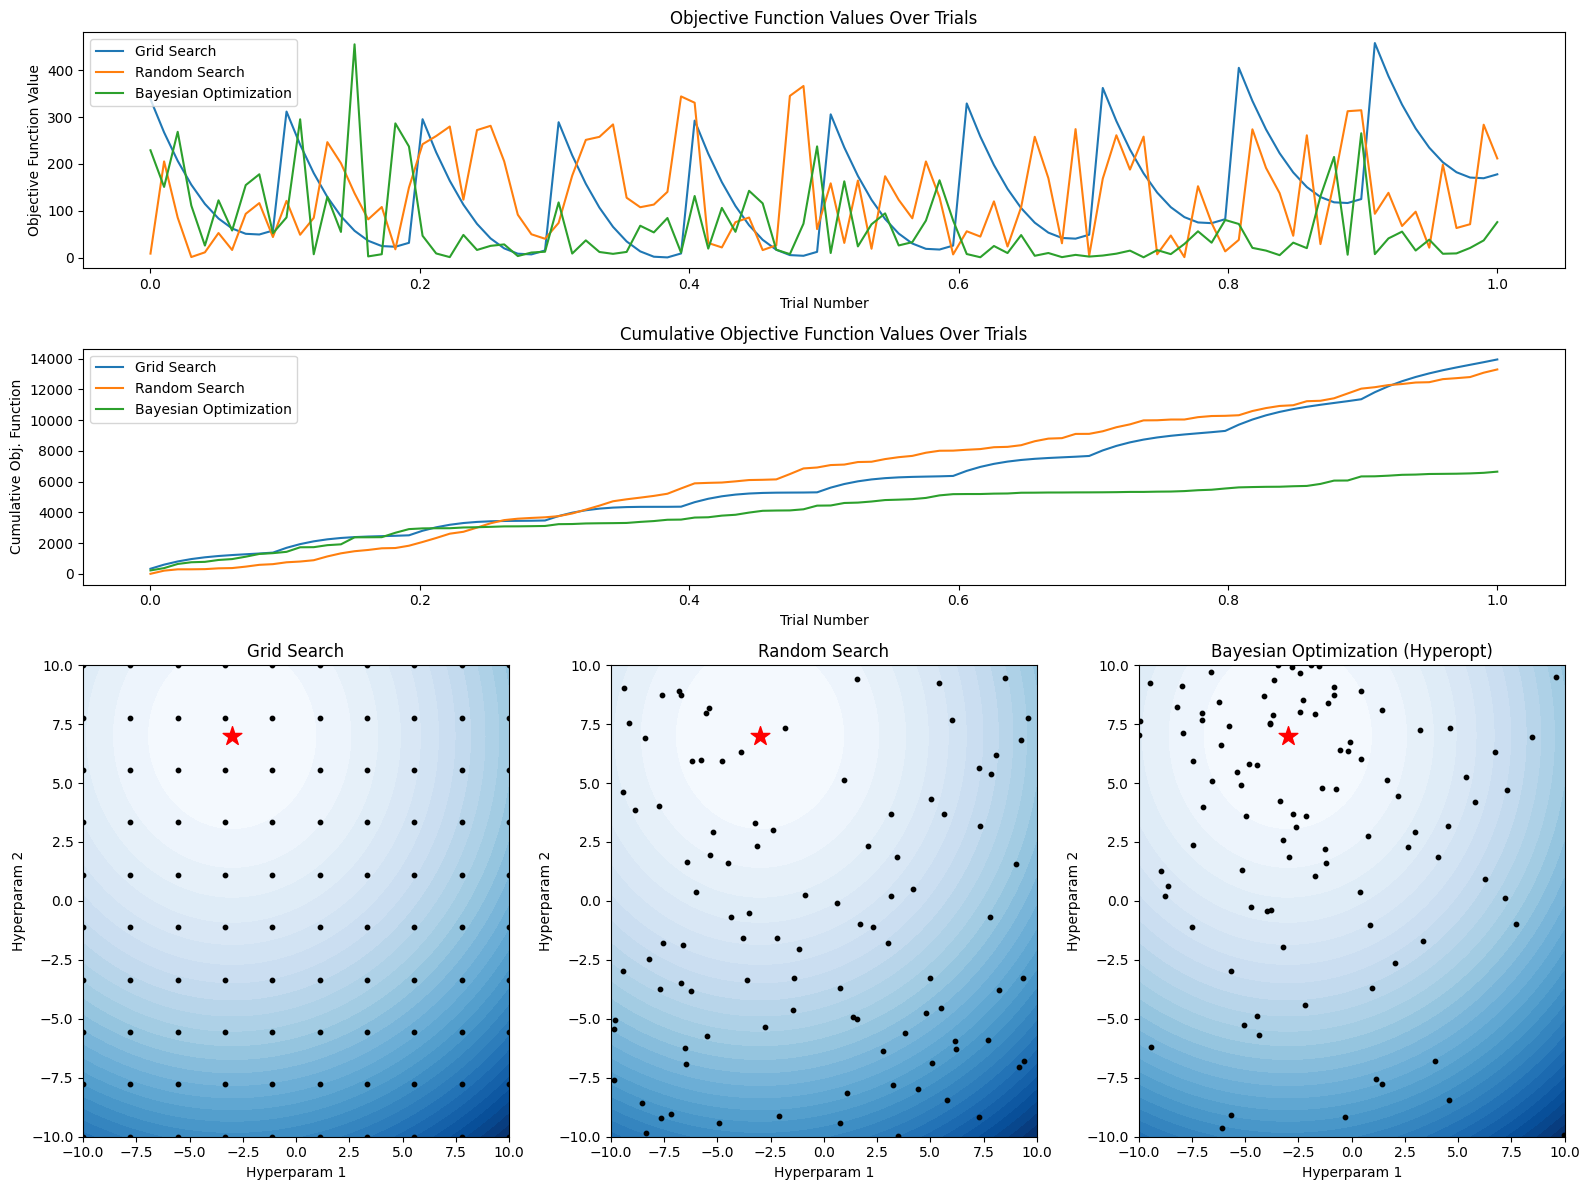

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from hyperopt import fmin, tpe, hp, Trials

# Objective function
def objective(params):
    x, y = params
    return (x + 3)**2 + (y - 7)**2  # Minimum at (-3, 7)

# Grid Search data
grid_x = np.linspace(-10, 10, 10)
grid_y = np.linspace(-10, 10, 10)
grid_points = np.array([(x, y) for x in grid_x for y in grid_y])
grid_scores = np.array([objective(p) for p in grid_points])

# Random Search data
n_random = 100
random_points = np.random.uniform(-10, 10, (n_random, 2))
random_scores = np.array([objective(p) for p in random_points])

# Bayesian Optimization (Hyperopt)
space = [hp.uniform('x', -10, 10), hp.uniform('y', -10, 10)]
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)
bayes_scores = np.array([t['result']['loss'] for t in trials.trials])
bayes_x = [t['misc']['vals']['x'][0] for t in trials.trials]
bayes_y = [t['misc']['vals']['y'][0] for t in trials.trials]

# Cumulative functions
def cumulative(arr): return np.cumsum(arr)

# Start plotting
fig = plt.figure(figsize=(16, 12))
gs = gridspec.GridSpec(3, 3, height_ratios=[1, 1, 2])

# Top plot: Objective Function Values
ax1 = fig.add_subplot(gs[0, :])
x_trials = np.linspace(0, 1, 100)
ax1.plot(x_trials, grid_scores[:100], label="Grid Search")
ax1.plot(x_trials, random_scores[:100], label="Random Search")
ax1.plot(x_trials, bayes_scores, label="Bayesian Optimization")
ax1.set_title("Objective Function Values Over Trials")
ax1.set_ylabel("Objective Function Value")
ax1.set_xlabel("Trial Number")
ax1.legend()

# Middle plot: Cumulative Objective Function
ax2 = fig.add_subplot(gs[1, :])
ax2.plot(x_trials, cumulative(grid_scores[:100]), label="Grid Search")
ax2.plot(x_trials, cumulative(random_scores[:100]), label="Random Search")
ax2.plot(x_trials[:len(bayes_scores)], cumulative(bayes_scores), label="Bayesian Optimization")
ax2.set_title("Cumulative Objective Function Values Over Trials")
ax2.set_ylabel("Cumulative Obj. Function")
ax2.set_xlabel("Trial Number")
ax2.legend()

# Contour background
xx, yy = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
zz = objective([xx, yy])
levels = np.linspace(np.min(zz), np.max(zz), 30)

# Bottom plots: Contours
ax3 = fig.add_subplot(gs[2, 0])
ax3.contourf(xx, yy, zz, levels=levels, cmap="Blues")
ax3.scatter(grid_points[:, 0], grid_points[:, 1], s=10, c='black')
ax3.scatter(-3, 7, marker='*', s=200, c='red')
ax3.set_title("Grid Search")
ax3.set_xlabel("Hyperparam 1")
ax3.set_ylabel("Hyperparam 2")

ax4 = fig.add_subplot(gs[2, 1])
ax4.contourf(xx, yy, zz, levels=levels, cmap="Blues")
ax4.scatter(random_points[:, 0], random_points[:, 1], s=10, c='black')
ax4.scatter(-3, 7, marker='*', s=200, c='red')
ax4.set_title("Random Search")
ax4.set_xlabel("Hyperparam 1")
ax4.set_ylabel("Hyperparam 2")

ax5 = fig.add_subplot(gs[2, 2])
ax5.contourf(xx, yy, zz, levels=levels, cmap="Blues")
ax5.scatter(bayes_x, bayes_y, s=10, c='black')
ax5.scatter(-3, 7, marker='*', s=200, c='red')
ax5.set_title("Bayesian Optimization (Hyperopt)")
ax5.set_xlabel("Hyperparam 1")
ax5.set_ylabel("Hyperparam 2")

plt.tight_layout()
plt.show()


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import make_scorer, mean_squared_error
from hyperopt import fmin, tpe, hp, Trials
import seaborn as sns
import matplotlib.gridspec as gridspec
import imageio.v2 as imageio #Import imageio.v2 to avoid the warning
import os

# Create directory for frames
output_dir = "frames"
os.makedirs(output_dir, exist_ok=True)

# Objective function
def objective(params):
    x, y = params
    return (x + 3)**2 + (y - 7)**2  # Minimum at (-3, 7)

# Grid Search setup
grid_x = np.linspace(-10, 10, 10)
grid_y = np.linspace(-10, 10, 10)
grid_points = np.array([(x, y) for x in grid_x for y in grid_y])
grid_scores = np.array([objective(p) for p in grid_points])

# Random Search setup
n_iterations = 100
random_points = np.random.uniform(-10, 10, (n_iterations, 2))
random_scores = [objective(p) for p in random_points]

# Bayesian Optimization setup
space = [hp.uniform('x', -10, 10), hp.uniform('y', -10, 10)]
trials = Trials()

# Contour grid
xx, yy = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
zz = objective([xx, yy])
levels = np.linspace(np.min(zz), np.max(zz), 30)

# Cumulative function
def cumulative(arr): return np.cumsum(arr)

# Run and save frames
for i in range(1, n_iterations + 1):
    # Run Bayesian step
    fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=i, trials=trials, verbose=0)
    bayes_scores = [t['result']['loss'] for t in trials.trials]
    bayes_x = [t['misc']['vals']['x'][0] for t in trials.trials]
    bayes_y = [t['misc']['vals']['y'][0] for t in trials.trials]

    # Create figure and layout
    fig = plt.figure(figsize=(16, 12))
    gs = gridspec.GridSpec(3, 3, height_ratios=[1, 1, 2])

    # Plot 1: Objective function values
    ax1 = fig.add_subplot(gs[0, :])
    x_trials = np.linspace(0, 1, i)
    ax1.plot(x_trials, grid_scores[:i], label="Grid Search")
    ax1.plot(x_trials, random_scores[:i], label="Random Search")
    ax1.plot(x_trials[:len(bayes_scores)], bayes_scores, label="Bayesian Optimization")
    ax1.set_title("Objective Function Values Over Trials")
    ax1.set_ylabel("Objective Function Value")
    ax1.set_xlabel("Trial Number")
    ax1.legend()

    # Plot 2: Cumulative values
    ax2 = fig.add_subplot(gs[1, :])
    ax2.plot(x_trials, cumulative(grid_scores[:i]), label="Grid Search")
    ax2.plot(x_trials, cumulative(random_scores[:i]), label="Random Search")
    ax2.plot(x_trials[:len(bayes_scores)], cumulative(bayes_scores), label="Bayesian Optimization")
    ax2.set_title("Cumulative Objective Function Values Over Trials")
    ax2.set_ylabel("Cumulative Obj. Function")
    ax2.set_xlabel("Trial Number")
    ax2.legend()

    # Plot 3: Grid Search contour
    ax3 = fig.add_subplot(gs[2, 0])
    ax3.contourf(xx, yy, zz, levels=levels, cmap="Blues")
    ax3.scatter(grid_points[:i, 0], grid_points[:i, 1], s=10, c='black')
    ax3.scatter(-3, 7, marker='*', s=200, c='red')
    ax3.set_title("Grid Search")
    ax3.set_xlabel("Hyperparam 1")
    ax3.set_ylabel("Hyperparam 2")

    # Plot 4: Random Search contour
    ax4 = fig.add_subplot(gs[2, 1])
    ax4.contourf(xx, yy, zz, levels=levels, cmap="Blues")
    ax4.scatter(random_points[:i, 0], random_points[:i, 1], s=10, c='black')
    ax4.scatter(-3, 7, marker='*', s=200, c='red')
    ax4.set_title("Random Search")
    ax4.set_xlabel("Hyperparam 1")
    ax4.set_ylabel("Hyperparam 2")

    # Plot 5: Bayesian Optimization contour
    ax5 = fig.add_subplot(gs[2, 2])
    ax5.contourf(xx, yy, zz, levels=levels, cmap="Blues")
    ax5.scatter(bayes_x, bayes_y, s=10, c='black')
    ax5.scatter(-3, 7, marker='*', s=200, c='red')
    ax5.set_title("Bayesian Optimization (Hyperopt)")
    ax5.set_xlabel("Hyperparam 1")
    ax5.set_ylabel("Hyperparam 2")

    # Main title with iteration count
    fig.suptitle(f"Hyperparameter Optimization Progress – Iteration {i}", fontsize=16)

    # Save frame
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    frame_path = os.path.join(output_dir, f"frame_{i:03d}.png")
    plt.savefig(frame_path)
    plt.close()

# Create GIF from saved frames
images = []
for i in range(1, n_iterations + 1):
    filename = os.path.join(output_dir, f"frame_{i:03d}.png")
    images.append(imageio.imread(filename))

imageio.mimsave("hyperparameter_optimization.gif", images, fps=20)
print("GIF saved as 'hyperparameter_optimization.gif'")


GIF saved as 'hyperparameter_optimization.gif'
